# Augmented Dickey-Fuller Test (ADF Test)

[Reference](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/)

## Introduction

In ARIMA test series forecasting, the first step is to determine the number of differencing required to make the series stationary.

Since testing the stationarity of a time series is a frequently performed activity in autoregressive models, the ADF test along with **KPSS test** is something that you need to be fluent in when performing time series analyses.

Another point to remember is that the ADF test is fundamentally a statistical significance test. That mean, there is a hypothesis involved with a null and alternate hypothesis and as a result a test statistic is computed and p-values get reported.

It is from the test statistic and the p-value, you can make an inference as to whether a given series is stationary or not.

So, how exactly does the ADF test work? Let's see the mathematical intuitino behind the test with clear examples.

## What is a Unit Root Test?

The ADF test belongs to a category of tests called `Unit Root Test`, which is the proper method for testing the stationarity of a time series.

So, what does a 'Unit Root' mean?

Unit root is a characteristic of a time series that makes it non-stationary. Technically speaking, a unit root is said to exist in a time series of the value of alpha = 1 in the below equation.

\begin{equation}
Y_t = \alpha Y_{t-1} + \beta X_{e} + \epsilon
\end{equation}

where,
- **$Y_t$** is the value of the time series at time 't'
- **$X_e$** is an exogenous variable (a separate explanatory variable, which is also a time series).

What does this mean to us?

The presence of a unit root means the time series is non-stationary. Besides, the number of unit roots contained in the series corresponds to the number of differencing operations required to make the series stationary.

## Dickey-Fuller Test

Before going into ADF, let's first understand what is the Dickey-Fuller test.

A Dickey-Fuller test is a unit root test that tests the null hypothesis that $\alpha = 1$ in the following model equation. `alpha` is the coefficient of the first lag on Y.

Null Hypothesis ($H_0$): alpha = 1

\begin{equation}
y_t = c + \beta t + \alpha y_{t-1} + \Phi \Delta Y_{t-1} + e_t
\end{equation}

where,
* $Y_{t-1}$ = lag 1 of time series
* $\Delta Y_{t-1}$ = first difference of the series at time (t-1)

Fundamentally, it has a similar null hypothesis as the unit root test. That is, the coefficient of $Y_{t-1}$ is 1, implying the presence of a unit root. If not rejected, the series is taken to be non-stationary.

The Augmented Dickey-Fuller test evolved based on the above equation and is one of the most common form of Unit Root test.

## How does Augmented Dickey Fuller (ADF) Test work?

As the name suggests, the ADF test is an 'augmented' version of the Dickey-Fuller test.

The ADF test expands the Dickey-Fuller test equation to include a higher order regressive processes in the model.

\begin{equation}
y_t = c + \beta t + \alpha y_{t-1} + \Phi \Delta Y_{t-2} + \ldots + \Phi \Delta Y_{t-p} + e_t
\end{equation}

You'll notice that we've added more differencing terms, while the rest of the equation remains the same. This **adds more thoroughness to the test**.

The null hypothesis however is still the same as the original Dickey-Fuller test.

A key point to remember however is: **Since the null hypothesis assumes the presence of unit root, that is $\alpha=1$, the p-value obtained should be less than the significance level (say 0.05) in order to reject the null hypothesis**. Thereby, inferring that the series is stationary.

However, this is a very common mistake analysts commit with this test. That is, if the p-value is less than significance level, people mistakenly take the series to be non-stationary.

## ADF Test in Python

So, how to perform an Augmented Dickey-Fuller test in Python?

The `statsmodel` package provides a reliable implementation of the ADF test via the `adfuller()` function in `statsmodels.tsa.stattools`. It returns the following outputs:

1. The p-value
1. The value of the test statistic
1. Number of lags considered for the test
1. The critical value cutoffs

When the test statistic is lower than the critical value shown, you reject the null hypothesis and infer that the time series is stationary.

Alright, let's run the ADF test on the `a10` dataset from the `fpp` package from R. This dataset counts the total monthly scripts for pharmaceutical products falling under ATC code A10. The original source of this dataset is the Australian Health Insurance Commission.

As seen earlier, the null hypothesis of the test is the presence of unit root, that is, the series is non-stationary.

In [1]:
# Setup and import data
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
%matplotlib inline

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
a10_filepath = 'data/a10.csv'
df = pd.read_csv(a10_filepath, parse_dates = ['date'], index_col='date')
series = df.loc[:, 'value'].values

df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


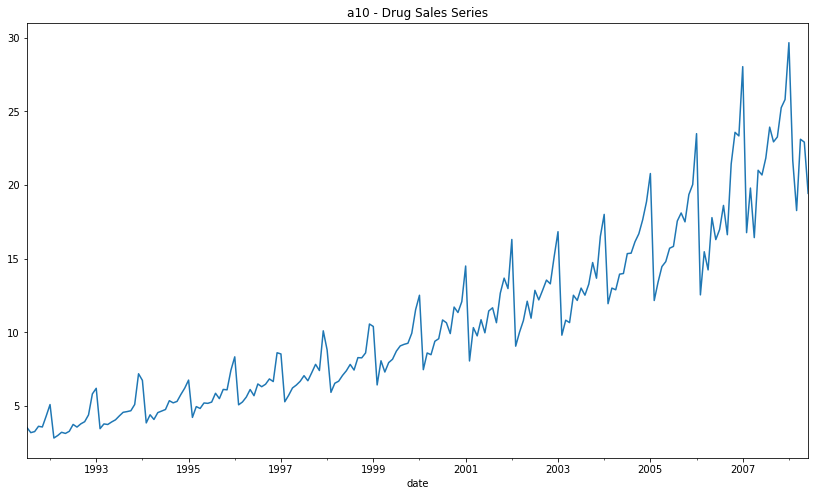

In [4]:
df.plot(figsize=(14,8), legend=None, title='a10 - Drug Sales Series')

The packages and the data is loaded, we have everything we need to perform the test using `adfuller()`.

An optional argument the `adfuller()` accepts is the number of lags you want to consider while performing the OLS regression.

By default, this value is `12*(nobs/100)^{1/4}`, where `nobs` is the numberr of observations in the series. But, optionally, you can specify either the maximum number of lags with `maxlags` parameter or let the algorithm compute the optimal number iteratively.

This can be done by setting the `autolag='AIC'`. By doing so, the `adfuller` will choose the number of lags that yields the lowest AIC. This is usually a good option to follow.

In [6]:
# ADF test
result = adfuller(series, autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: 3.1451856893067403
n_lags: 1.0
p-value: 1.0
Critical Values:
   1%, -3.465620397124192
Critical Values:
   5%, -2.8770397560752436
Critical Values:
   10%, -2.5750324547306476


The p-value obtained is greater than significance level of 0.05 and the ADF statistic is higher than any of the critical values.

Clearly, there is no reason to reject the null hypothesis. So, **the time series is in fact non-stationary**.

## ADF Test on stationary series

Now, let's see another example of performing the test on a series of random numbers which is usually considered as stationary.

Let's use `np.random.randn()` to generate a randomized series.

In [7]:
# ADF test on random numbers
np.random.seed(953)
series = np.random.randn(100)
result = adfuller(series, autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -10.149545054258994
p-value: 8.018429382308642e-18
Critical Values:
   1%, -3.498198082189098
Critical Values:
   5%, -2.891208211860468
Critical Values:
   10%, -2.5825959973472097


The p-value is much lower than the significance level of 0.05 and hence we can reject the null hypothesis and take that the series is stationary.

Let's visualize the series as well to confirm.

Text(0.5, 1.0, 'Random')

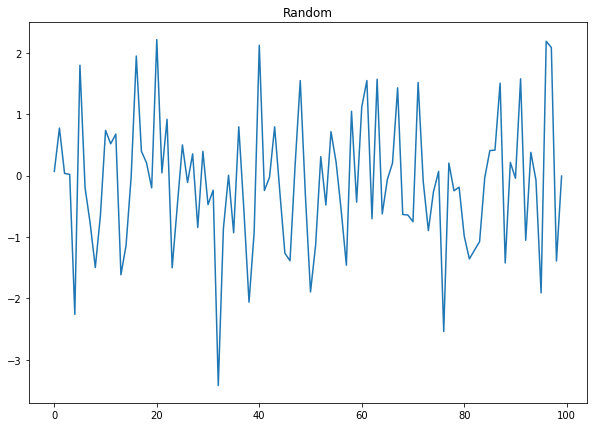

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(figsize = (10, 7))
plt.plot(series)
plt.title('Random')